# Insights

## Part 1 - Studying the dataset and Assumptions
1. There are multiple instances of same FPN
2. FPN is a six digit number 
3. It's being mentioned on the CMS website that the data might be inaccurate at some instance but later it will be taken care of, therefore, it is being assumed that all the given data is accurate at this moment.
4. Only those data will be considered only if they have passed quality assurance check.
5. First week data of the facility can be ignored as the facility may not be familiar with data inputting.

## Part 2 - Extracting the dataset of each facility
1. The task at hand is to extract the dataset based on FPN 
2. The next task is to implement assumptions and cleaning the dataset
    - Remove data that does not have passed quality assurance check
    - Remove first entry of data from a facility; or it can be modified to remove date containing 05/24/2020 as it might contain data from 01/01/2020. 
    - The Data might have different data types, therefore, convert all to numeric


In [31]:
#Importing the Libraries
import pandas as pd
import numpy as np
pd.options.display.max_columns = None
import matplotlib.pyplot as plt

In [32]:
#Reading DataSet - Star Ratings
df = pd.read_csv("COVID-19_Nursing_Home_Dataset.csv",index_col=False,low_memory=False)

## Part 1 - Studying the Dataset

In [33]:
cols = list(df.columns)

In [34]:
print("Number of Rows: {}\nNumber of Columns: {} \nThe name of the columns are \n {}".format(len(df),len(cols),cols))

Number of Rows: 138482
Number of Columns: 59 
The name of the columns are 
 ['Week Ending', 'Federal Provider Number', 'Provider Name', 'Provider Address', 'Provider City', 'Provider State', 'Provider Zip Code', 'Submitted Data', 'Passed Quality Assurance Check', 'Residents Weekly Admissions COVID-19', 'Residents Total Admissions COVID-19', 'Residents Weekly Confirmed COVID-19', 'Residents Total Confirmed COVID-19', 'Residents Weekly Suspected COVID-19', 'Residents Total Suspected COVID-19', 'Residents Weekly All Deaths', 'Residents Total All Deaths', 'Residents Weekly COVID-19 Deaths', 'Residents Total COVID-19 Deaths', 'Number of All Beds', 'Total Number of Occupied Beds', 'Resident Access to Testing in Facility', 'Laboratory Type Is State Health Dept', 'Laboratory Type Is Private Lab', 'Laboratory Type Is Other', 'Staff Weekly Confirmed COVID-19', 'Staff Total Confirmed COVID-19', 'Staff Weekly Suspected COVID-19', 'Staff Total Suspected COVID-19', 'Staff Weekly COVID-19 Deaths', 'S

In [35]:
df['Provider Name'].describe()

count                   138482
unique                   15127
top       MILLER'S MERRY MANOR
freq                       270
Name: Provider Name, dtype: object

In [36]:
df['Federal Provider Number'].describe()

count     138482
unique     15393
top       445131
freq           9
Name: Federal Provider Number, dtype: object

In [37]:
#df[df['Provider Name'].str.contains("MILLER'S MERRY MANOR")]
df[df['Federal Provider Number'].str.match("315254")].head(3)

,Week Ending,Federal Provider Number,Provider Name,Provider Address,Provider City,Provider State,Provider Zip Code,Submitted Data,Passed Quality Assurance Check,Residents Weekly Admissions COVID-19,Residents Total Admissions COVID-19,Residents Weekly Confirmed COVID-19,Residents Total Confirmed COVID-19,Residents Weekly Suspected COVID-19,Residents Total Suspected COVID-19,Residents Weekly All Deaths,Residents Total All Deaths,Residents Weekly COVID-19 Deaths,Residents Total COVID-19 Deaths,Number of All Beds,Total Number of Occupied Beds,Resident Access to Testing in Facility,Laboratory Type Is State Health Dept,Laboratory Type Is Private Lab,Laboratory Type Is Other,Staff Weekly Confirmed COVID-19,Staff Total Confirmed COVID-19,Staff Weekly Suspected COVID-19,Staff Total Suspected COVID-19,Staff Weekly COVID-19 Deaths,Staff Total COVID-19 Deaths,Shortage of Nursing Staff,Shortage of Clinical Staff,Shortage of Aides,Shortage of Other Staff,Any Current Supply of N95 Masks,One-Week Supply of N95 Masks,Any Current Supply of Surgical Masks,One-Week Supply of Surgical Masks,Any Current Supply of Eye Protection,One-Week Supply of Eye Protection,Any Current Supply of Gowns,One-Week Supply of Gowns,Any Current Supply of Gloves,One-Week Supply of Gloves,Any Current Supply of Hand Sanitizer,One-Week Supply of Hand Sanitizer,Ventilator Dependent Unit,Number of Ventilators in Facility,Number of Ventilators in Use for COVID-19,Any Current Supply of Ventilator Supplies,One-Week Supply of Ventilator Supplies,"Total Resident Confirmed COVID-19 Cases Per 1,000 Residents","Total Resident COVID-19 Deaths Per 1,000 Residents",Total Residents COVID-19 Deaths as a Percentage of Confirmed COVID-19 Cases,County,Three or More Confirmed and Suspected COVID-19 Cases This Week,Initial Confirmed COVID-19 Case This Week,Geolocation
70824,06/28/2020,315254,ALARIS HEALTH AT BOULEVARD EAST,6819 BOULEVARD EAST,GUTTENBERG,NJ,7093,Y,Y,1.0,4.0,0.0,3.0,0.0,0.0,0.0,0,0.0,0.0,108.0,72,Y,N,Y,N,0.0,2.0,0,0,0.0,0.0,N,N,N,N,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,N,NaN,NaN,NaN,NaN,41.7,0.0,0.0,Hudson,N,N,POINT (-74.001282 40.790238)
72007,05/31/2020,315254,ALARIS HEALTH AT BOULEVARD EAST,6819 BOULEVARD EAST,GUTTENBERG,NJ,7093,Y,Y,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0,0.0,0.0,108.0,73,Y,N,Y,N,0.0,0.0,0,0,0.0,0.0,N,N,N,N,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,N,NaN,NaN,NaN,NaN,13.7,0.0,0.0,Hudson,N,Y,POINT (-74.001282 40.790238)
75394,07/05/2020,315254,ALARIS HEALTH AT BOULEVARD EAST,6819 BOULEVARD EAST,GUTTENBERG,NJ,7093,Y,Y,0.0,4.0,0.0,3.0,0.0,0.0,0.0,0,0.0,0.0,108.0,70,Y,N,Y,N,0.0,2.0,0,0,0.0,0.0,N,N,N,N,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,N,NaN,NaN,NaN,NaN,42.9,0.0,0.0,Hudson,N,N,POINT (-74.001282 40.790238)


In [38]:
df['Week Ending'] = df['Week Ending'].astype('datetime64[ns]')

## Part 2 

In [39]:
#Task 1
def get_facility_data(df,num):
    new = df[df['Federal Provider Number'].str.match(num)]
    if len(new) == 0:
        print("No Data Found")
        return None
    return new
new = get_facility_data(df,'015035')

In [40]:
#Task 2 

#Subtask 1 - 
def remove_null_ns(df,name):
    """
    Input:
        df - DataFrame
        name - name of the column
    Output: 
        DataFrame
    Work : 
        Takes the name of column and the dataframe and refractor all the N's and Null
    """
    new= df[df[name] != 'N'] #Dropping Ns
    new = new.dropna(subset=[name]) #Dropping Null
    return new
#remove_null_ns(new,'Passed Quality Assurance Check')

#Subtask 2 - 
def remove_val(df,name,val):
    """
    Input:
        df - DataFrame
        name - name of the column
        val - value to be removed
    Output: 
        DataFrame
    Work : 
        Takes the name of column and the dataframe and delete the lowest
    """
    new= df[df[name] != val] #Dropping specific value
    return new


In [41]:
#Task 3

#Function to convert all the values to numeric (if found something else)
def dtype_converter(df,initial=[object],final=pd.to_numeric):
    for i in df.columns:
        if df[i].dtype in initial:
            df[i] = final(df[i])
    return df
#dtype_converter(new,initial=[object],final=pd.to_numeric)

In [42]:
new = get_facility_data(df,'475044')
new = remove_null_ns(new,'Passed Quality Assurance Check')
new = remove_val(new,"Week Ending",min(new["Week Ending"]))

In [43]:
new = new.replace('Y',1)
new = new.replace('N',0)
new = new.drop(['Submitted Data','Passed Quality Assurance Check','Federal Provider Number','Provider Address','Provider Name','Provider City','Provider State','Provider Zip Code','County','Geolocation'], axis = 1)
new = new.sort_values(by='Week Ending')
new = dtype_converter(new,initial=[object],final=pd.to_numeric)
new

,Week Ending,Residents Weekly Admissions COVID-19,Residents Total Admissions COVID-19,Residents Weekly Confirmed COVID-19,Residents Total Confirmed COVID-19,Residents Weekly Suspected COVID-19,Residents Total Suspected COVID-19,Residents Weekly All Deaths,Residents Total All Deaths,Residents Weekly COVID-19 Deaths,Residents Total COVID-19 Deaths,Number of All Beds,Total Number of Occupied Beds,Resident Access to Testing in Facility,Laboratory Type Is State Health Dept,Laboratory Type Is Private Lab,Laboratory Type Is Other,Staff Weekly Confirmed COVID-19,Staff Total Confirmed COVID-19,Staff Weekly Suspected COVID-19,Staff Total Suspected COVID-19,Staff Weekly COVID-19 Deaths,Staff Total COVID-19 Deaths,Shortage of Nursing Staff,Shortage of Clinical Staff,Shortage of Aides,Shortage of Other Staff,Any Current Supply of N95 Masks,One-Week Supply of N95 Masks,Any Current Supply of Surgical Masks,One-Week Supply of Surgical Masks,Any Current Supply of Eye Protection,One-Week Supply of Eye Protection,Any Current Supply of Gowns,One-Week Supply of Gowns,Any Current Supply of Gloves,One-Week Supply of Gloves,Any Current Supply of Hand Sanitizer,One-Week Supply of Hand Sanitizer,Ventilator Dependent Unit,Number of Ventilators in Facility,Number of Ventilators in Use for COVID-19,Any Current Supply of Ventilator Supplies,One-Week Supply of Ventilator Supplies,"Total Resident Confirmed COVID-19 Cases Per 1,000 Residents","Total Resident COVID-19 Deaths Per 1,000 Residents",Total Residents COVID-19 Deaths as a Percentage of Confirmed COVID-19 Cases,Three or More Confirmed and Suspected COVID-19 Cases This Week,Initial Confirmed COVID-19 Case This Week
117956,2020-05-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,60.0,45,1,1,0,0,0.0,0.0,1,3,0.0,0.0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,0
104868,2020-06-07,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,0.0,0.0,60.0,43,1,1,0,0,0.0,0.0,1,4,0.0,0.0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,0
111089,2020-06-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0,60.0,43,1,1,0,0,0.0,0.0,1,5,0.0,0.0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,0
107555,2020-06-21,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,0.0,0.0,60.0,43,1,1,0,0,0.0,0.0,0,5,0.0,0.0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,0
114929,2020-06-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0,0.0,60.0,42,1,1,0,0,0.0,0.0,2,7,0.0,0.0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,0
118722,2020-07-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0,0.0,60.0,42,1,1,0,0,0.0,0.0,0,7,0.0,0.0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,0
105767,2020-07-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0,0.0,60.0,41,1,1,0,0,0.0,0.0,1,8,0.0,0.0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,0
110894,2020-07-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0,0.0,60.0,43,1,1,0,0,0.0,0.0,1,9,0.0,0.0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,0


## Feature Selection 

In [44]:
#Importing the Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import common as c
pd.options.display.max_columns = None
%matplotlib inline
#pd.set_option('use_inf_as_na', True)


from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
#Importing the data
nursing,rating = c.fetch_both_data()

In [45]:
new = nursing
new = new.replace('Y',1)
new = new.replace('N',0)
new = new.drop(["Week Ending",'Submitted Data','Provider Address','Provider Name','Provider City','Provider State','Provider Zip Code','County','Geolocation'], axis = 1)
new = new.fillna(0)

In [46]:
new = nursing
a = ["Week Ending",'Submitted Data','Provider Address','Provider Name','Provider City','Provider State','Provider Zip Code','County','Geolocation']
np.intersect1d(new.columns, a)



array(['County', 'Geolocation', 'Provider Address', 'Provider City',
       'Provider Name', 'Provider State', 'Provider Zip Code',
       'Submitted Data', 'Week Ending'], dtype=object)

In [47]:
new = new.replace([np.inf, np.nan, -np.inf], 0)

In [48]:
y_train = [] 
drop = [] #If data not found, mark that FPN
for i in new["Federal Provider Number"]:
    try:
        temp = c.get_facility_data(rating,i)["Staffing Rating"].values #Fetch the star rating 
    except:
        drop.append(i) #If error mark the FPN for dropping
        continue
    if temp[0]==None or np.isnan(temp[0]) or temp[0]==np.inf: #If value not found mark the FPN for dropping
        drop.append(i)
        continue
    y_train.append(temp[0])
y_train = pd.Series(y_train)  
len(y_train)


No Data Found
No Data Found
No Data Found
No Data Found
No Data Found
No Data Found
No Data Found
No Data Found
No Data Found
No Data Found
No Data Found
No Data Found
No Data Found
No Data Found
No Data Found
No Data Found
No Data Found
No Data Found
No Data Found
No Data Found
No Data Found


127842

In [49]:
print(new.shape) #Check the initial shape
for i in drop:
    new.drop(new[new['Federal Provider Number'] == i].index, inplace = True) 
print(new.shape) #Checking the final shape 

# y_train = y_train.fillna(0)


(138482, 59)
(127842, 59)


In [50]:

new = new.drop(["Federal Provider Number"],axis=1)

"""
There are some values that dataframe could not identify the dtype 
Therefore, Converting them to numeric and if found some exceptional value then it will coerce the error to 0
"""
convert = ['Total Resident Confirmed COVID-19 Cases Per 1,000 Residents','Total Resident COVID-19 Deaths Per 1,000 Residents','Total Residents COVID-19 Deaths as a Percentage of Confirmed COVID-19 Cases','Staff Weekly Suspected COVID-19','Staff Total Suspected COVID-19','Total Number of Occupied Beds','Residents Total All Deaths']
for i in convert:
    new[i] = pd.to_numeric(new[i], errors='coerce').fillna(0).astype(int)

#Choosing only numeric data
numerics = ['int16','int32','int64','float16','float32','float64']
numerical_vars = list(new.select_dtypes(include=numerics).columns)
data = new[numerical_vars]
data.shape


(127842, 24)

In [51]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

numerics = ['int16','int32','int64','float16','float32','float64']
numerical_vars = list(new.select_dtypes(include=numerics).columns)
data = new[numerical_vars]
data.shape

scaler = StandardScaler()
scaler.fit(data.fillna(0))

clf = LassoCV().fit(scaler.transform(data), y_train)
importance = np.abs(clf.coef_)
print(importance)

[0.08113078 0.00048276 0.         0.00129748 0.04043889 0.
 0.         0.00287244 0.01570726 0.         0.02954622 0.20455696
 0.10500544 0.         0.08322038 0.00429872 0.09508937 0.
 0.00397762 0.0376939  0.00065958 0.06835925 0.0151782  0.00340804]


In [52]:
idx_tenth = importance.argsort()[-11]
threshold = importance[idx_tenth] + 0.000000000001

idx_features = (-importance).argsort()[:11]
name_features = np.array(data.columns)[idx_features]
print('Selected features: {}'.format(name_features))

Selected features: ['Number of All Beds' 'Total Number of Occupied Beds'
 'Staff Total Suspected COVID-19' 'Staff Total Confirmed COVID-19'
 'Provider Zip Code'
 'Total Resident Confirmed COVID-19 Cases Per 1,000 Residents'
 'Residents Total Confirmed COVID-19' 'Number of Ventilators in Facility'
 'Residents Total COVID-19 Deaths' 'Residents Total All Deaths'
 'Total Resident COVID-19 Deaths Per 1,000 Residents']


In [53]:
idx_features

sfm = SelectFromModel(clf, threshold=threshold)
sfm.fit(scaler.transform(data), y_train)
X_transform = sfm.transform(scaler.transform(data))

n_features = sfm.transform(scaler.transform(data)).shape[1]

n_features

10

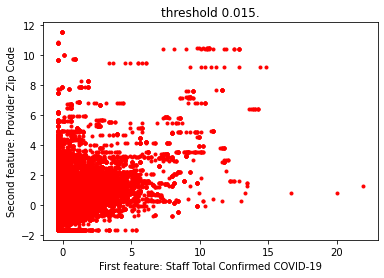

In [54]:
plt.title("threshold %0.3f." % sfm.threshold)
i = 3
j = 4
feature1 = X_transform[:, i]
feature2 = X_transform[:, j]
plt.plot(feature1, feature2, 'r.')
plt.xlabel("First feature: {}".format(name_features[i]))
plt.ylabel("Second feature: {}".format(name_features[j]))
# plt.ylim([np.min(feature2), np.max(feature2)])
plt.show()

## Part 5 

In [55]:
grp = rating.groupby('Overall Rating')

In [56]:
for i,j in grp:
    print(i)
    print(j["Health Inspection Rating"].mean())


1.0
1.190374787052811
2.0
1.7456492637215528
3.0
2.6420475319926875
4.0
3.376607470912431
5.0
4.245604963805584


In [57]:
print(j["Health Inspection Rating"].mean())


4.245604963805584


In [58]:
len(nursing)

138482